In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from graphingFunctions import *
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

redData = pd.read_csv('C:\\Users\\Hannah\\Documents\\winequality-red.csv', ';')
whiteData = pd.read_csv('C:\\Users\\Hannah\\Documents\\winequality-white.csv', ';')
Xr = redData.values[:, :-1]
yr = redData.values[:, -1]

Xr_w = whiteData.values[:, :-1]
yr_w = whiteData.values[:, -1]

Xr_scale = preprocessing.scale(Xr)
Xr_wscale = preprocessing.scale(Xr_w)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scale, yr)
Xr_wtrain, Xr_wtest, yr_wtrain, yr_wtest = train_test_split(Xr_wscale, yr_w)
ros = RandomOverSampler(random_state = 0)
X_resample, y_resample = ros.fit_sample(Xr_train, yr_train)
X_wresample, y_wresample = ros.fit_sample(Xr_wtrain, yr_wtrain)
r_mod = svm.SVC()
s_mod = svm.SVC()
w_mod = svm.SVC()
t_mod = svm.SVC()
r_mod.kernel = 'poly'
r_mod.fit(Xr_train, yr_train)
s_mod.kernel = 'poly'
s_mod.fit(X_resample, y_resample)
w_mod.kernel = 'poly'
w_mod.fit(X_wresample, y_wresample)
t_mod.kernel = 'poly'
t_mod.fit(Xr_wtrain, yr_wtrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [2]:
# 1) create svm model
# 2) find most important coefficients
# 3) compare sets of 2 components
# polynomial kernel works best...
r_mod.score(Xr_test, yr_test)
dec = r_mod.decision_function(Xr_train)
print('Number of classes:', dec.shape[1])

Number of classes: 6


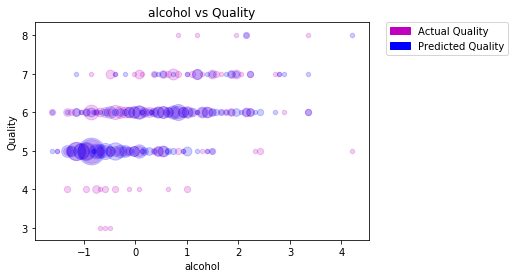

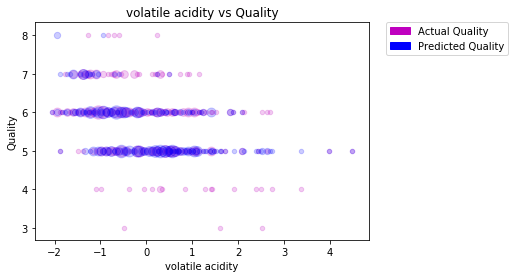

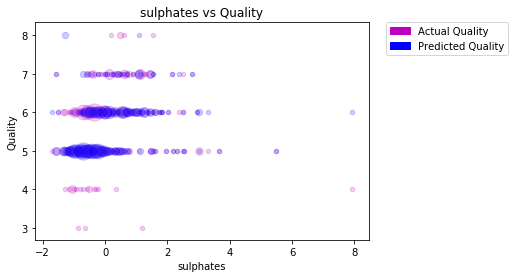

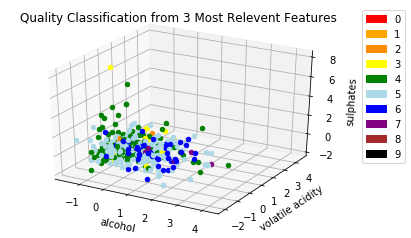

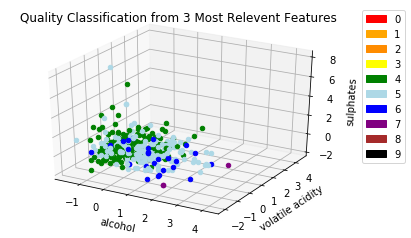

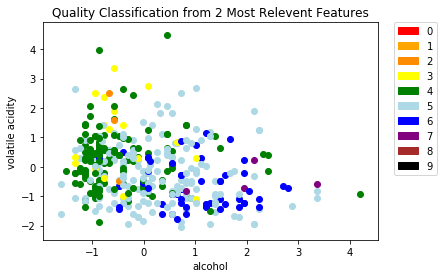

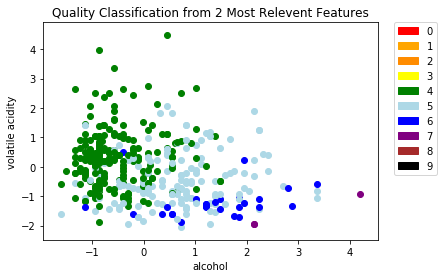

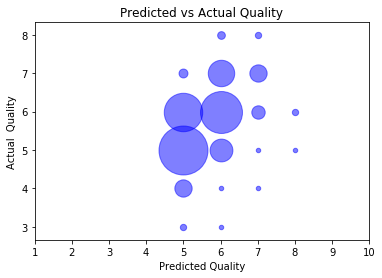

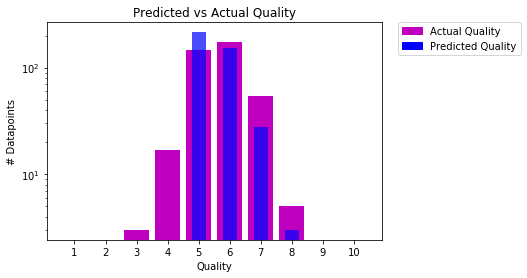


Mean squared error on training data: 0.60
Variance score (1 is perfect prediction): 0.13



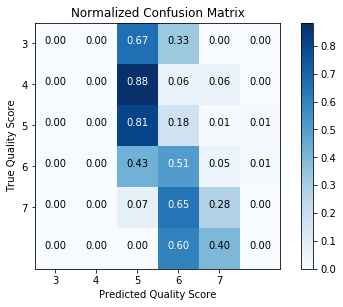

In [3]:
og_pred = r_mod.predict(Xr_test)
print_all_graphs(Xr_test, yr_test, og_pred, list(redData.columns.values), 'Quality', 'red')

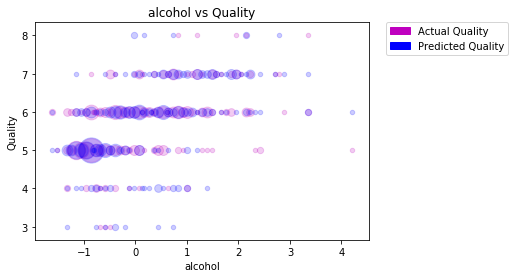

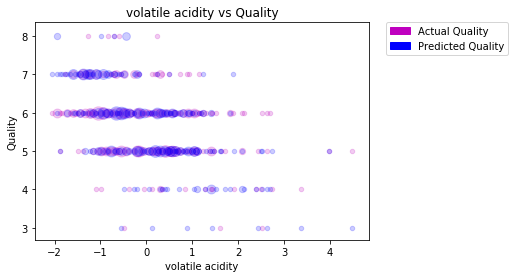

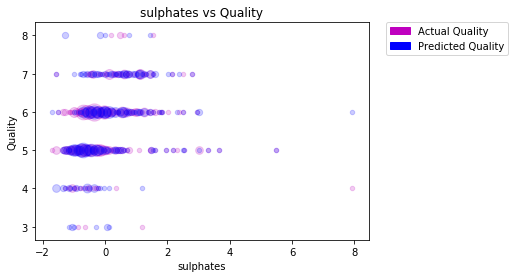

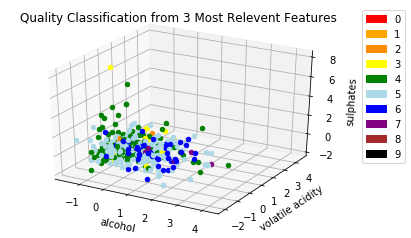

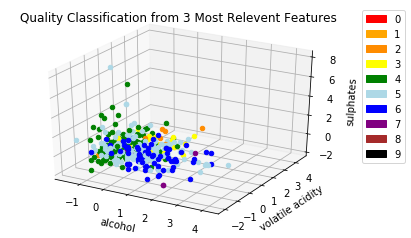

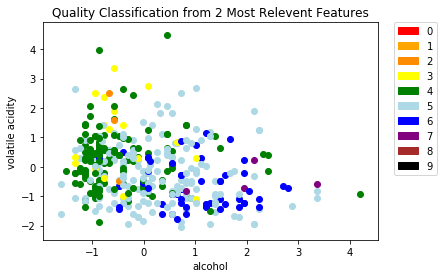

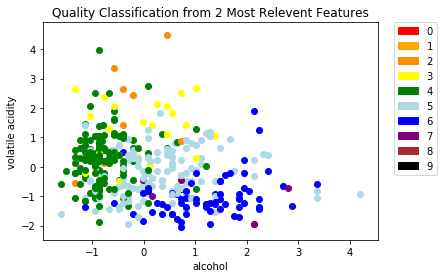

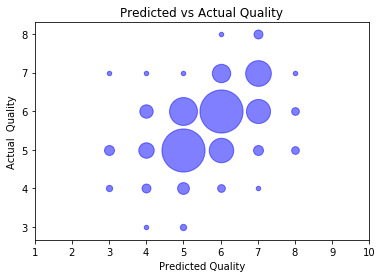

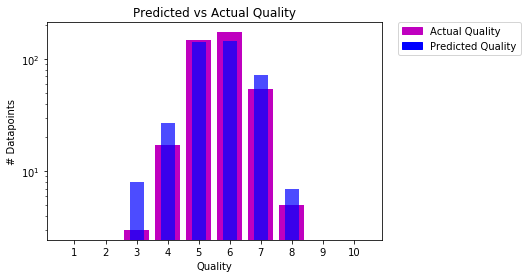


Mean squared error on training data: 0.80
Variance score (1 is perfect prediction): -0.15



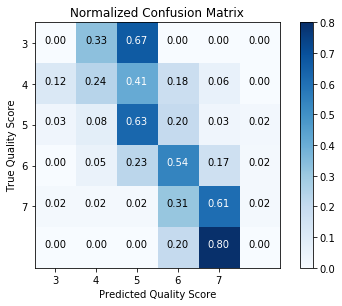

In [4]:
os_pred = s_mod.predict(Xr_test)
print_all_graphs(Xr_test, yr_test, os_pred, list(redData.columns.values), 'Quality', 'red')

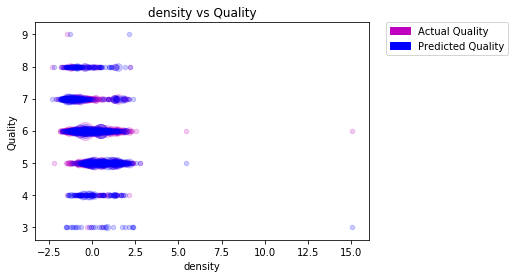

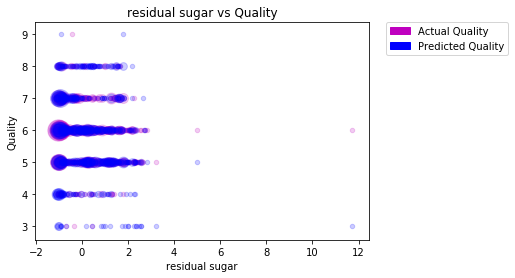

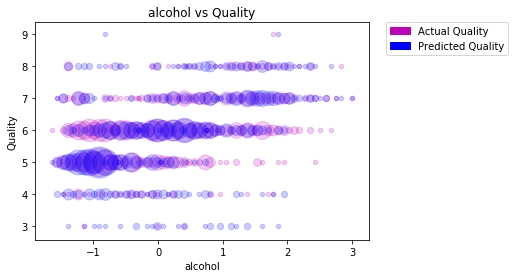

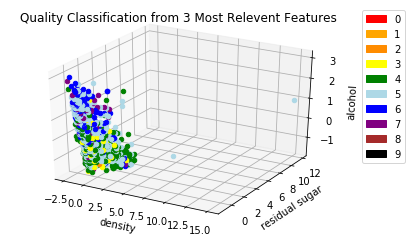

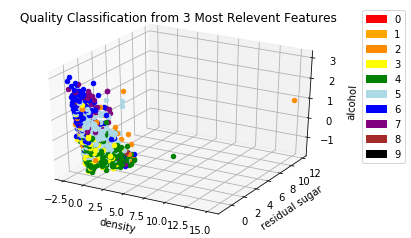

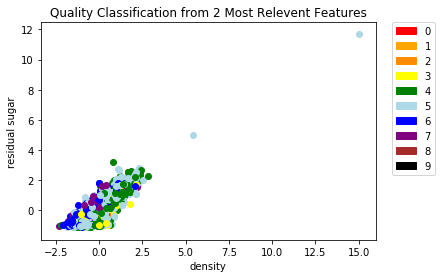

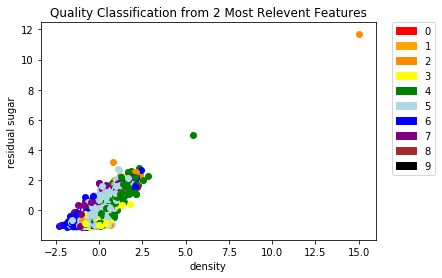

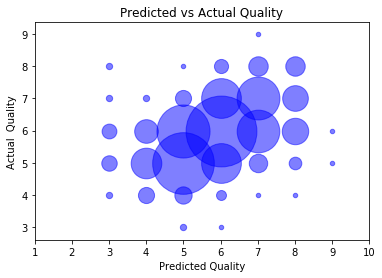

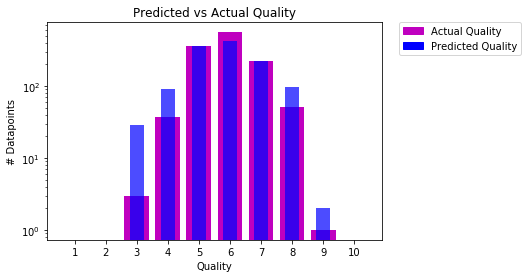


Mean squared error on training data: 1.09
Variance score (1 is perfect prediction): -0.40



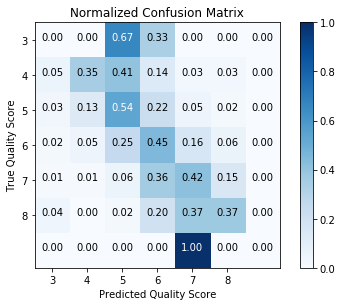

In [5]:
w_pred = w_mod.predict(Xr_wtest)
print_all_graphs(Xr_wtest, yr_wtest,
                 w_pred, list(whiteData.columns.values), 'Quality', 'white')

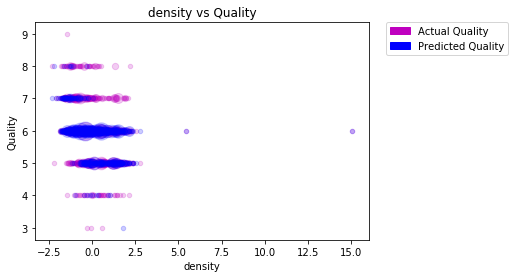

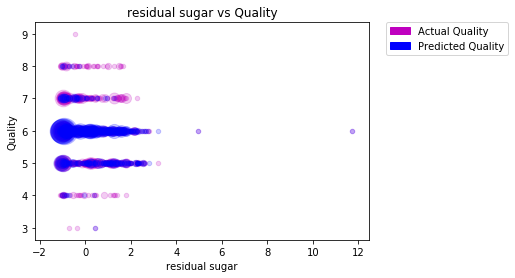

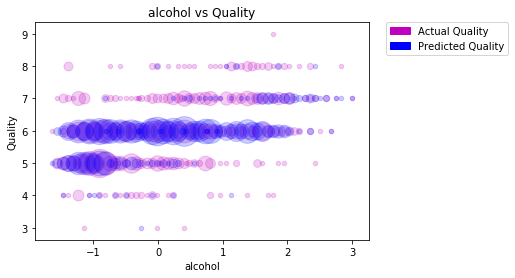

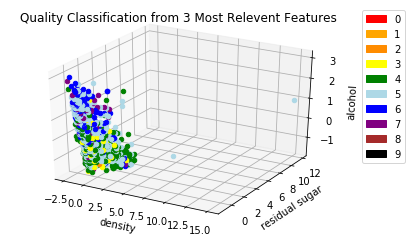

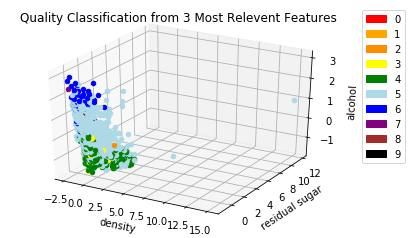

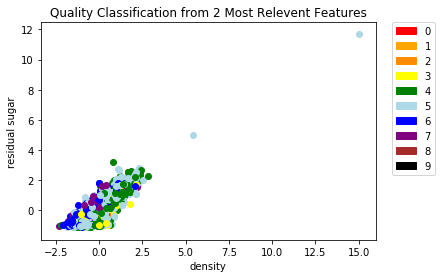

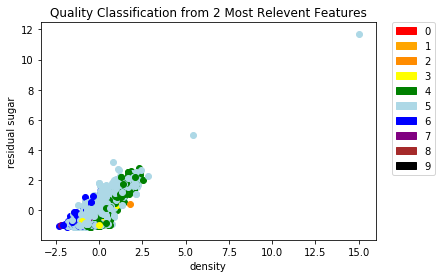

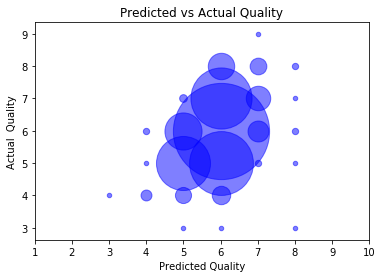

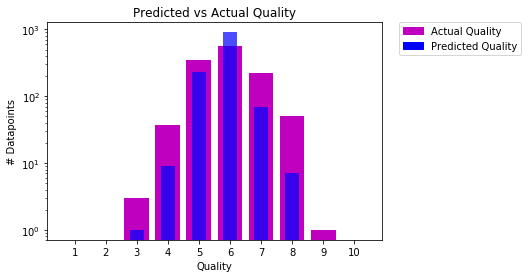


Mean squared error on training data: 0.66
Variance score (1 is perfect prediction): 0.15



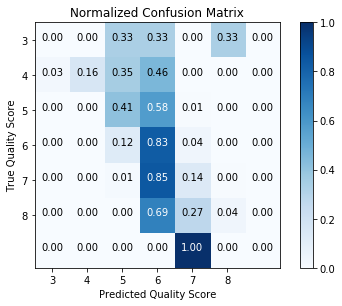

In [6]:
t_pred = t_mod.predict(Xr_wtest)
print_all_graphs(Xr_wtest, yr_wtest,
                 t_pred, list(whiteData.columns.values), 'Quality', 'white')